### Activity 6.01.

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Read the data files for train and test set- Ensure that they are in the same folder where you're running the Jupyter notebook
train_df = pd.read_csv("Amazon_reviews_train.csv")
test_df = pd.read_csv("Amazon_reviews_test.csv")

In [4]:
#print and examine first 5 records
print(train_df.shape, train_df.shape)
train_df.head(5)

(25000, 2) (25000, 2)


,review_text,label
0,Stuning even for the non-gamer: This sound tra...,1
1,The best soundtrack ever to anything.: I'm rea...,1
2,Amazing!: This soundtrack is my favorite music...,1
3,Excellent Soundtrack: I truly like this soundt...,1
4,"Remember, Pull Your Jaw Off The Floor After He...",1


2. For convenience in processing, separate the raw text and the labels for the train and test set.  Print the first two reviews from the train text.

You should have 4 variables - 

  - train_raw: raw text for the train data
  - train_labels: labels for the train data
  - test_raw: raw text for the test data
  - test_labels: labels for the test data

In [9]:
train_raw = train_df.review_text.values
train_labels = train_df.label.values

In [10]:
test_raw = test_df.review_text.values
test_labels = test_df.label.values

In [16]:
train_raw[:2]

array(['Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
       "The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."],
      dtype=object)

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [18]:
train_tokens = [word_tokenize(review.lower()) for review in train_raw]
test_tokens = [word_tokenize(review.lower()) for review in test_raw]

Wall time: 1min 14s


In [19]:
#Print the first review from the train data to check if the tokenization worked.
print(train_tokens[0])

['stuning', 'even', 'for', 'the', 'non-gamer', ':', 'this', 'sound', 'track', 'was', 'beautiful', '!', 'it', 'paints', 'the', 'senery', 'in', 'your', 'mind', 'so', 'well', 'i', 'would', 'recomend', 'it', 'even', 'to', 'people', 'who', 'hate', 'vid', '.', 'game', 'music', '!', 'i', 'have', 'played', 'the', 'game', 'chrono', 'cross', 'but', 'out', 'of', 'all', 'of', 'the', 'games', 'i', 'have', 'ever', 'played', 'it', 'has', 'the', 'best', 'music', '!', 'it', 'backs', 'away', 'from', 'crude', 'keyboarding', 'and', 'takes', 'a', 'fresher', 'step', 'with', 'grate', 'guitars', 'and', 'soulful', 'orchestras', '.', 'it', 'would', 'impress', 'anyone', 'who', 'cares', 'to', 'listen', '!', '^_^']


In [20]:
from string import punctuation
stop_punct = list(punctuation)
#download the stopwords corpus 
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

In [21]:
stop_final = stop_punct + stop_nltk

In [22]:
def drop_stop(input_tokens):
    return [token for token in input_tokens if token not in stop_final]

In [23]:
train_tokens_no_stop = [drop_stop(sent) for sent in train_tokens]
test_tokens_no_stop = [drop_stop(sent) for sent in test_tokens]

Wall time: 17.1 s


In [25]:
print(train_tokens_no_stop[0])

['stuning', 'even', 'non-gamer', 'sound', 'track', 'beautiful', 'paints', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'played', 'game', 'chrono', 'cross', 'games', 'ever', 'played', 'best', 'music', 'backs', 'away', 'crude', 'keyboarding', 'takes', 'fresher', 'step', 'grate', 'guitars', 'soulful', 'orchestras', 'would', 'impress', 'anyone', 'cares', 'listen', '^_^']


In [27]:
from nltk.stem import PorterStemmer
stemmer_p = PorterStemmer()

In [28]:
train_tokens_stem = [[stemmer_p.stem(token) for token in sent] for sent in train_tokens_no_stop]
test_tokens_stem = [[stemmer_p.stem(token) for token in sent] for sent in test_tokens_no_stop]

Wall time: 1min 32s


In [29]:
print(train_tokens_stem[0])

['stune', 'even', 'non-gam', 'sound', 'track', 'beauti', 'paint', 'seneri', 'mind', 'well', 'would', 'recomend', 'even', 'peopl', 'hate', 'vid', 'game', 'music', 'play', 'game', 'chrono', 'cross', 'game', 'ever', 'play', 'best', 'music', 'back', 'away', 'crude', 'keyboard', 'take', 'fresher', 'step', 'grate', 'guitar', 'soul', 'orchestra', 'would', 'impress', 'anyon', 'care', 'listen', '^_^']


In [41]:
train_texts = [" ".join(txt) for txt in train_tokens_stem]
test_texts = [" ".join(txt) for txt in test_tokens_stem]

Wall time: 144 ms


In [42]:
print(train_texts[0])

stune even non-gam sound track beauti paint seneri mind well would recomend even peopl hate vid game music play game chrono cross game ever play best music back away crude keyboard take fresher step grate guitar soul orchestra would impress anyon care listen ^_^


In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [44]:
vocab_size = 10000

In [ ]:
tok = Tokenizer(num_words=vocab_size)

In [48]:
tok.fit_on_texts(train_texts)

Wall time: 2.23 s


In [49]:
train_sequences = tok.texts_to_sequences(train_texts)
test_sequences = tok.texts_to_sequences(test_texts)

In [52]:
print(train_sequences[0])

[22, 514, 7161, 85, 190, 184, 1098, 283, 20, 11, 1267, 22, 56, 370, 9682, 114, 41, 71, 114, 8166, 1455, 114, 51, 71, 29, 41, 58, 182, 2931, 2153, 75, 8167, 816, 2666, 829, 719, 3871, 11, 483, 120, 268, 110]


In [64]:
seq_lens = [len(seq) for seq in train_sequences]

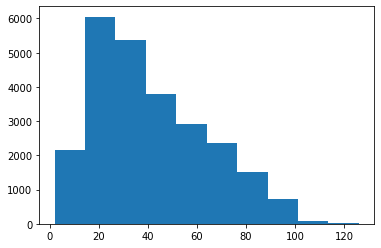

In [91]:
plt.hist(seq_lens)
plt.show()

In [74]:
maxlen = 100

In [72]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [127]:
X_train = pad_sequences(train_sequences, maxlen=maxlen)
X_test = pad_sequences(test_sequences, maxlen=maxlen)

In [76]:
X_train.shape

(25000, 100)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D, Dropout, GRU, LSTM

In [131]:
model_lstm = Sequential()

In [132]:
model_lstm.add(Embedding(vocab_size, output_dim=32))
model_lstm.add(SpatialDropout1D(0.4))

In [133]:
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dropout(0.4))

In [134]:
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(32, activation='relu'))
model_lstm.add(Dropout(0.5))

In [135]:
model_lstm.add(Dense(1, activation='sigmoid'))
 
model_lstm.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, None, 32)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 64)          24832     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)               

In [136]:
history_lstm = model_lstm.fit(X_train, train_labels, batch_size=128, validation_split=0.2, epochs = 5)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 86s 4ms/sample - loss: 0.5599 - accuracy: 0.7080 - val_loss: 0.4052 - val_accuracy: 0.8186
Epoch 2/5
20000/20000 [==============================] - 71s 4ms/sample - loss: 0.3692 - accuracy: 0.8594 - val_loss: 0.3954 - val_accuracy: 0.8478
Epoch 3/5
20000/20000 [==============================] - 71s 4ms/sample - loss: 0.3056 - accuracy: 0.8870 - val_loss: 0.3774 - val_accuracy: 0.8466
Epoch 4/5
20000/20000 [==============================] - 71s 4ms/sample - loss: 0.2759 - accuracy: 0.8983 - val_loss: 0.3677 - val_accuracy: 0.8586
Epoch 5/5
20000/20000 [==============================] - 69s 3ms/sample - loss: 0.2508 - accuracy: 0.9074 - val_loss: 0.3447 - val_accuracy: 0.8518


In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [139]:
test_pred = model_lstm.predict_classes(X_test)

In [140]:
print(confusion_matrix(test_labels, test_pred))

array([[10226,  1931],
       [ 1603, 11240]], dtype=int64)

In [141]:
print(accuracy_score(test_labels, test_pred))

0.85864